# *Model:* GARCH
# *Stock Data:* NSEI
# *Name: *Abbas Amjherawala**

In [2]:
#install yfinance library that helps in stock data retrieval 
!pip install yfinance
!pip install arch

#import necessary libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from time import time
import datetime
import warnings

#ignore any future warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.7/903.7 kB 12.1 MB/s eta 0:00:0000:0100:01


In [3]:
#to import NSEI stock data, set ticker symbol to ^NSEI
tickerSymbol = '^NSEI'
data = yf.Ticker(tickerSymbol)
data

yfinance.Ticker object <^NSEI>

In [4]:
#retrieve data from this day one year before to today
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365)
tomorrow = end_date + datetime.timedelta(days=1)
prices = data.history(start=start_date, end=end_date).Close
prices

Date
2022-03-14 00:00:00+05:30    16871.300781
2022-03-15 00:00:00+05:30    16663.000000
2022-03-16 00:00:00+05:30    16975.349609
2022-03-17 00:00:00+05:30    17287.050781
2022-03-21 00:00:00+05:30    17117.599609
                                 ...     
2023-03-03 00:00:00+05:30    17594.349609
2023-03-06 00:00:00+05:30    17711.449219
2023-03-08 00:00:00+05:30    17754.400391
2023-03-09 00:00:00+05:30    17589.599609
2023-03-10 00:00:00+05:30    17412.900391
Name: Close, Length: 248, dtype: float64

In [5]:
#calculate returns
returns = prices.pct_change().dropna()
returns

Date
2022-03-15 00:00:00+05:30   -0.012346
2022-03-16 00:00:00+05:30    0.018745
2022-03-17 00:00:00+05:30    0.018362
2022-03-21 00:00:00+05:30   -0.009802
2022-03-22 00:00:00+05:30    0.011561
                               ...   
2023-03-03 00:00:00+05:30    0.015729
2023-03-06 00:00:00+05:30    0.006656
2023-03-08 00:00:00+05:30    0.002425
2023-03-09 00:00:00+05:30   -0.009282
2023-03-10 00:00:00+05:30   -0.010046
Name: Close, Length: 247, dtype: float64

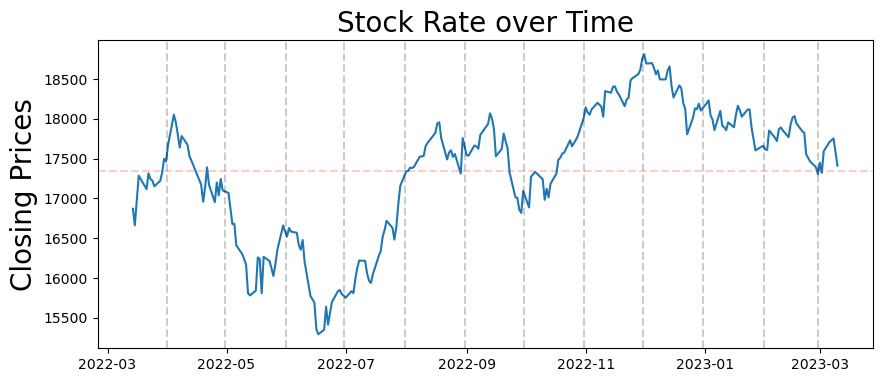

In [6]:
#plot the stock close price against time
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Closing Prices', fontsize=20)
plt.title('Stock Rate over Time', fontsize=20)

dates = pd.date_range(start='2022-03-03', end='2023-03-03', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(prices.mean(), color='r', alpha=0.2, linestyle='--')

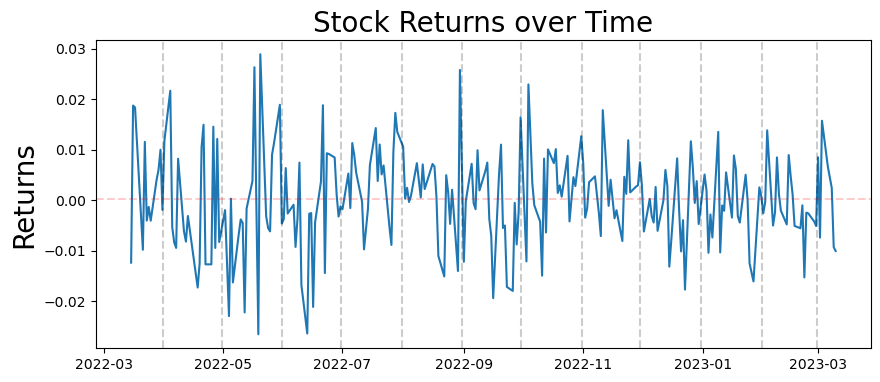

In [7]:
#plot the stock returns against time
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Returns', fontsize=20)
plt.title('Stock Returns over Time', fontsize=20)

dates = pd.date_range(start='2022-03-03', end='2023-03-03', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(returns.mean(), color='r', alpha=0.2, linestyle='--')

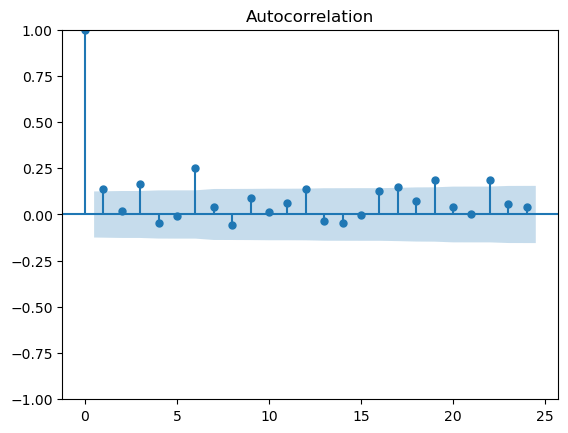

In [38]:
#plot acf to check MA order, here we can't see any informative lag
plot_acf(returns**2)
plt.show()

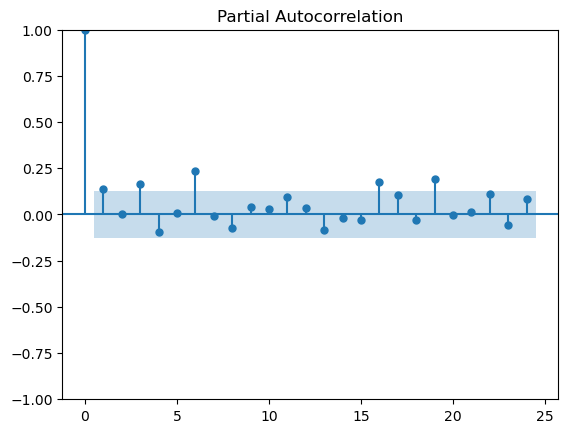

In [39]:
#plot pacf to check AR order, here we can't see any informative lag
plot_pacf(returns**2, method='ywm')
plt.show()

In [40]:
#give GARCH model a manual random order and fit it
model = arch_model(returns, p=6, q=6)
results = model.fit()

Iteration:      1,   Func. Count:     16,   Neg. LLF: 460311808.9342076
Iteration:      2,   Func. Count:     37,   Neg. LLF: -809.2398576718829
Optimization terminated successfully    (Exit mode 0)
            Current function value: -809.2398578932571
            Iterations: 6
            Function evaluations: 37
            Gradient evaluations: 2


In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                809.240
Distribution:                  Normal   AIC:                          -1590.48
Method:            Maximum Likelihood   BIC:                          -1541.35
                                        No. Observations:                  247
Date:                Tue, Mar 14 2023   Df Residuals:                      246
Time:                        18:59:44   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.8642e-04  6.393e-04      0.604      0.546 [-8.665e-04,1.639e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.8371e-06  7.810e-11  1.132e+05      0.000 [8.837e-06,8.837e-06]
alpha[1]       0.0333  7.132e-02      0.467      0.640     [ -0.106,  0.173]
alpha[2]       0.0333  7.152e-02      0.466      0.641     [ -0.107,  0.174]
alpha[3]       0.0333  6.816e-02      0.489      0.625     [ -0.100,  0.167]
alpha[4]       0.0333  9.674e-02      0.345      0.730     [ -0.156,  0.223]
alpha[5]       0.0333  8.804e-02      0.379      0.705     [ -0.139,  0.206]
alpha[6]       0.0333      0.192      0.174      0.862     [ -0.343,  0.410]
beta[1]        0.1167      1.004      0.116      0.908     [ -1.852,  2.085]
beta[2]        0.1167      0.487      0.240      0.811     [ -0.838,  1.071]
beta[3]        0.1167      0.822      0.142      0.887     [ -1.495,  1.729]
beta[4]        0.1167      0.642      0.182      0.856     [ -1.141,  1.374]
beta[5]        0.1167      0.734      0.159      0.874     [ -1.321,  1.555]
beta[6]        0.1167      1.281  9.107e-02      0.927     [ -2.394,  2.628]
============================================================================

Covariance estimator: robust
"""

In [42]:
forecast_horizon = 1
forecasts = results.forecast(horizon=forecast_horizon)
predicted_volatility = np.sqrt(forecasts.variance.iloc[-1])

In [49]:
last_price = prices.iloc[-1]
predicted_price = last_price * np.exp(predicted_volatility * np.random.normal())
print(f'The predicted stock price for the next day is {predicted_price[0]}')

The predicted stock price for the next day is 17253.677798427496
